# COURSE PROJECT : Predicting Final Grades from Student Data

#### Group name: 
- Group_1

#### Group Members:
- Omer Yalavac  - s3849677
- Vincent Tang
- Rhyme Bulbul - s3850912

# Table of Contents
1. [Introduction](#Introduction)
2. [Overview](#Overview)
3. [Third Example](#third-example)
4. [Fourth Example](#fourth-examplehttpwwwfourthexamplecom)

# Introduction <a name="Introduction"></a>

The objective of this project is to predict the final grade of students using multiple linear regression.

# Overview <a name="Overview"></a>

### Data Source

Our dataset contains data on the achievement of students in secondary education of two Portuguese schools. The dataset was collected from http://archive.ics.uci.edu/ml/datasets/Student+Performance, using `student-por.csv`.
Our dataset has 649 instances, with 33 attributes, which can be verified with <code>df.dtypes</code>.

In [1]:
import pandas as pd

df = pd.read_csv('student-por.csv', sep=';')
pd.set_option('display.max_columns', None)

Our dataset was only one column of data including the column title with only the semi-colon (;) symbol seperating values, and so it needed to be seperated when being read in order to create the seperate columns with their respective row values using 
```
sep = ';'
```
---
This is how our dataset currently looks:

In [2]:
df.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
426,MS,F,15,R,GT3,T,3,3,at_home,other,course,mother,2,1,0,no,yes,no,no,yes,yes,yes,no,5,4,4,2,3,5,4,10,10,11
125,GP,M,15,U,GT3,T,3,4,services,services,home,father,1,1,0,yes,no,no,no,yes,yes,yes,no,5,5,5,3,2,5,2,9,9,9
599,MS,M,18,R,GT3,T,4,4,at_home,services,other,mother,3,1,0,no,yes,yes,yes,yes,yes,yes,yes,2,5,5,1,1,1,5,12,13,14
177,GP,M,16,U,GT3,T,1,3,at_home,services,course,father,1,1,1,no,no,no,no,yes,no,yes,no,5,3,3,1,4,2,2,9,8,8
180,GP,M,16,U,GT3,T,2,2,other,other,course,father,1,2,0,no,no,no,no,yes,no,yes,no,4,3,5,2,4,4,0,9,10,11
448,MS,F,16,R,GT3,T,4,4,teacher,teacher,course,mother,2,3,0,no,no,no,yes,yes,yes,yes,yes,4,2,2,1,1,4,6,16,16,17
484,MS,F,16,U,LE3,A,2,2,other,other,home,mother,1,1,0,no,yes,no,no,yes,no,no,no,4,3,4,1,2,1,6,7,7,8
25,GP,F,16,U,GT3,T,2,2,services,services,home,mother,1,1,0,no,yes,no,no,no,yes,yes,no,1,2,2,1,3,5,6,10,11,12
642,MS,F,17,U,GT3,T,4,3,teacher,other,other,mother,2,2,0,no,no,no,no,yes,yes,yes,no,5,5,4,1,1,1,0,6,9,11
588,MS,F,17,U,GT3,T,4,1,health,at_home,course,mother,1,1,0,no,yes,no,no,yes,yes,no,yes,3,2,2,1,1,5,0,8,10,9


### Project Objective

### Target Feature

### Descriptive Features

The variable descriptions below are from the <code>student-por</code> file:

- <code>school</code>- student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- <code>sex</code> - student's sex (binary: 'F' - female or 'M' - male)
- <code>age</code> - student's age (numeric: from 15 to 22)
- <code>address</code> - student's home address type (binary: 'U' - urban or 'R' - rural)
- <code>famsize</code> - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- <code>Pstatus</code> - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- <code>Medu</code> - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- <code>Fedu</code> - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- <code>Mjob</code> - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- <code>Fjob</code> - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- <code>reason</code> - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- <code>guardian</code> - student's guardian (nominal: 'mother', 'father' or 'other')
- <code>traveltime</code> - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- <code>studytime</code> - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- <code>failures</code> - number of past class failures (numeric: n if 1<=n<3, else 4)
- <code>schoolsup</code> - extra educational support (binary: yes or no)
- <code>famsup</code> - family educational support (binary: yes or no)
- <code>paid</code> - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- <code>activities</code> - extra-curricular activities (binary: yes or no)
- <code>nursery</code> - attended nursery school (binary: yes or no)
- <code>higher</code> - wants to take higher education (binary: yes or no)
- <code>internet</code> - Internet access at home (binary: yes or no)
- <code>romantic</code> - with a romantic relationship (binary: yes or no)
- <code>famrel</code> - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- <code>freetime</code> - free time after school (numeric: from 1 - very low to 5 - very high)
- <code>goout</code> - going out with friends (numeric: from 1 - very low to 5 - very high)
- <code>Dalc</code> - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- <code>Walc</code> - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- <code>health</code> - current health status (numeric: from 1 - very bad to 5 - very good)
- <code>absences</code> - number of school absences (numeric: from 0 to 93) 

### these grades are related with the course subject, Math or Portuguese:
- <code>G1</code> - first period grade (numeric: from 0 to 20)
- <code>G2</code> - second period grade (numeric: from 0 to 20)
- <code>G3</code> - final grade (numeric: from 0 to 20, output target)

# Data Preparation

## Preliminaries

In [3]:
# Importing modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import patsy
import warnings
###
warnings.filterwarnings('ignore')
###
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

## Data Cleaning and Transformation

In [4]:
print(f"Shape of the dataset is {df.shape} \n")
print(f"Data types are below where 'object' indicates a string type: ")
print(df.dtypes)

Shape of the dataset is (649, 33) 

Data types are below where 'object' indicates a string type: 
school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


---
Since our response variable is the final grade (G3), we do not need data on the first two periods so we will remove them:

In [5]:
df = df.drop(['G1', 'G2'], axis = 1)

---
- The student's age is irrelevant information as the range is too small for there to be any significant impact to the student's final age 
- The parent's cohabitation status, parent's job, and the reason for selecting the school the student attends, provides little to no value to our dataset, hence we will remove them. 
- The guardian of the student would only be relevant if the parents were apart, and considering that not all student's parents are apart, we will also remove this. 
- The columns: freetime, studytime, traveltime, goout, and activities all refer to how time was spent outside of school hours. Since we dont need all the specific details of time spent outside of school hours, only keeping freetime, traveltime and studytime would give us all the information we need.
- Weather a student attended nursery school or not would be relevant to their current grades, especially if they're receiving school support, family support and/or paid extra classes.

In [6]:
df = df.drop(['age', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'goout', 'activities', 'nursery'], axis = 1)

Workday alcohol consumption (Dalc) and weekend alcohol consumption (Walc) can be added together to create weekly alcohol consumption (Wkalc), a rating out of 10 (from 0-very low to 8-very high):

In [7]:
df['Wkalc'] = df['Walc'] + df['Dalc'] - 2
df = df.drop(columns=['Walc', 'Dalc'])
df['Wkalc'].describe()

count    649.000000
mean       1.782743
std        1.992411
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max        8.000000
Name: Wkalc, dtype: float64

In [8]:
print(f'Now the number of columns are {df.shape[1]}. The dataset currently looks like:')
df.head()

Now the number of columns are 21. The dataset currently looks like:


,school,sex,address,famsize,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,higher,internet,romantic,famrel,freetime,health,absences,G3,Wkalc
0,GP,F,U,GT3,4,4,2,2,0,yes,no,no,yes,no,no,4,3,3,4,11,0
1,GP,F,U,GT3,1,1,1,2,0,no,yes,no,yes,yes,no,5,3,3,2,11,0
2,GP,F,U,LE3,1,1,1,2,0,yes,no,no,yes,yes,no,4,3,3,6,12,3
3,GP,F,U,GT3,4,2,1,3,0,no,yes,no,yes,yes,yes,3,2,5,0,14,0
4,GP,F,U,GT3,3,3,1,2,0,no,yes,no,yes,no,no,4,3,5,0,13,1


### Fixing numerical variables that don't begin with 0:

Our model would make a lot more sense if our numerical variables (eg: famrel is a rating between 1 and 5) began with 0 instead of 1. If variables began with 0, our equation for our data model would be a lot more simplified and our intersept can then be explained as the expected age without the influence of the other variables. 

Such variables are:
- traveltime
- studytime
- famrel
- freetime
- health

In [9]:
df['traveltime'] = df['traveltime'] - 1
df['studytime'] = df['studytime'] - 1
df['famrel'] = df['famrel'] - 1
df['freetime'] = df['freetime'] - 1
df['health'] = df['health'] - 1

### Discretising very large ranged numerical variables:

We will check the variable `absences` using the `value_counts` method in Pandas.

In [10]:
df['absences'].value_counts().sort_index()

0     244
1      12
2     110
3       7
4      93
5      12
6      49
7       3
8      42
9       7
10     21
11      5
12     12
13      1
14      8
15      2
16     10
18      3
21      2
22      2
24      1
26      1
30      1
32      1
Name: absences, dtype: int64

The variable `absences` would be a lot easier to understand if we discretise it into 5 sections. 

In [11]:
df['absences'] = pd.cut(df['absences'], bins = 5, labels=['very low', 'low', 'medium', 'high', 'very high'])

Let's see how our values look now using the `value_counts` method in Pandas.

In [12]:
df['absences'].value_counts()

very low     527
low           90
medium        24
high           5
very high      3
Name: absences, dtype: int64

It seems perfect. Let's now perform integer encoding such that *very low* is 0, *low* is 1, *medium* is 2, *high* is 3 and *very high* is 4.

In [13]:
level_mapping = {'very low': 0, 'low': 1, 'medium': 2, 'high': 3, 'very high': 4}
df['absences'] = df['absences'].replace(level_mapping)

df.sample(5)

,school,sex,address,famsize,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,higher,internet,romantic,famrel,freetime,health,absences,G3,Wkalc
547,MS,M,R,LE3,4,1,0,0,0,no,no,no,yes,yes,no,3,0,1,0,11,1
624,MS,F,R,GT3,1,1,2,0,1,no,yes,no,yes,yes,yes,4,1,0,0,9,1
282,GP,M,U,GT3,3,2,1,0,0,no,no,no,no,yes,no,3,3,4,1,7,4
424,MS,F,R,GT3,2,2,1,1,0,no,yes,no,yes,yes,no,3,3,4,0,12,0
317,GP,F,U,LE3,2,2,1,1,0,yes,yes,no,yes,yes,yes,3,3,4,0,12,3


## Checking for Missing Values

In [14]:
print(f"\nNumber of missing values for each feature:")
print(df.isnull().sum())


Number of missing values for each feature:
school        0
sex           0
address       0
famsize       0
Medu          0
Fedu          0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
health        0
absences      0
G3            0
Wkalc         0
dtype: int64


**No missing attributes for any of the features** so no need to remove any rows.

## Summary Statistics

In [15]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of continuous features</b>'))
df.describe(include='int64')

,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,health,absences,G3,Wkalc
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,2.514638,2.306626,0.568567,0.930663,0.221880,2.930663,2.180277,2.536210,0.254237,11.906009,1.782743
std,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.446259,0.604830,3.230656,1.992411
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,0.000000,0.000000,0.000000,3.000000,2.000000,1.000000,0.000000,10.000000,0.000000
50%,2.000000,2.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,12.000000,1.000000
75%,4.000000,3.000000,1.000000,1.000000,0.000000,4.000000,3.000000,4.000000,0.000000,14.000000,3.000000
max,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,19.000000,8.000000


In [16]:
display(HTML('<b>Table 2: Summary of categorical features</b>'))
df.describe(include='object')

,school,sex,address,famsize,schoolsup,famsup,paid,higher,internet,romantic
count,649,649,649,649,649,649,649,649,649,649
unique,2,2,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,no,yes,no,yes,yes,no
freq,423,383,452,457,581,398,610,580,498,410


# Data Exploration

## Numerical features

### Searching for Outliers

We will check if any of the numerical features have any outliers based on `Table 1: Summary of continuous features`.

- Medu is expected to contain values between `0 to 4`. Based on Table 1, the minimum is `0` and the maximum is `4` and, hence, contains `no outliers`.
- Fedu is expected to contain values between `0 to 4`. Based on Table 1, the minimum is `0` and the maximum is `4` and, hence, contains `no outliers`.
- traveltime is expected to contain values between `0 to 3`. Based on Table 1, the minimum is `0` and the maximum is `3` and, hence, contains `no outliers`.
- studytime is expected to contain values between `0 to 3`. Based on Table 1, the minimum is `0` and the maximum is `3` and, hence, contains `no outliers`.
- failures is expected to contain values between `0 to 4`. Based on Table 1, the minimum is `0` and the maximum is `3` and, hence, contains `no outliers`.
- famrel is expected to contain values between `0 to 4`. Based on Table 1, the minimum is `0` and the maximum is `4` and, hence, contains `no outliers`.
- freetime is expected to contain values between `0 to 4`. Based on Table 1, the minimum is `0` and the maximum is `4` and, hence, contains `no outliers`.
- health is expected to contain values between `0 to 4`. Based on Table 1, the minimum is `0` and the maximum is `4` and, hence, contains `no outliers`.
- absences is expected to contain values between `0 to 4`. Based on Table 1, the minimum is `0` and the maximum is `4` and, hence, contains `no outliers`.
- G3 is expected to contain values between `0 to 20`. Based on Table 1, the minimum is `0` and the maximum is `19` and, hence, contains `no outliers`.
- Wkalc is expected to contain values between `0 to 8`. Based on Table 1, the minimum is `0` and the maximum is `8` and, hence, contains `no outliers`.

## Catagorical Features

In [17]:
categoricalColumns = df.columns[df.dtypes==object].tolist()

for col in categoricalColumns:
    print('Unique values for ' + col)
    print(df[col].unique())
    print('')

Unique values for school
['GP' 'MS']

Unique values for sex
['F' 'M']

Unique values for address
['U' 'R']

Unique values for famsize
['GT3' 'LE3']

Unique values for schoolsup
['yes' 'no']

Unique values for famsup
['no' 'yes']

Unique values for paid
['no' 'yes']

Unique values for higher
['yes' 'no']

Unique values for internet
['no' 'yes']

Unique values for romantic
['no' 'yes']



Each catagorical feature contains only two unique values each, such as 'yes' or 'no', meaning we don't need to one hot encode any variables. 

It seems like no accidental symbol, such as a full stop (.) is in any of the rows for any of the catagorical columns, so we dont need to use:
```
df['column_name'].str.rstrip(".")
``` 

We can now consider our dataset 'clean' & ready for visualisation & data modelling.

## Univariate Visualisation

Lets get a histogram of Study time & Travel times.

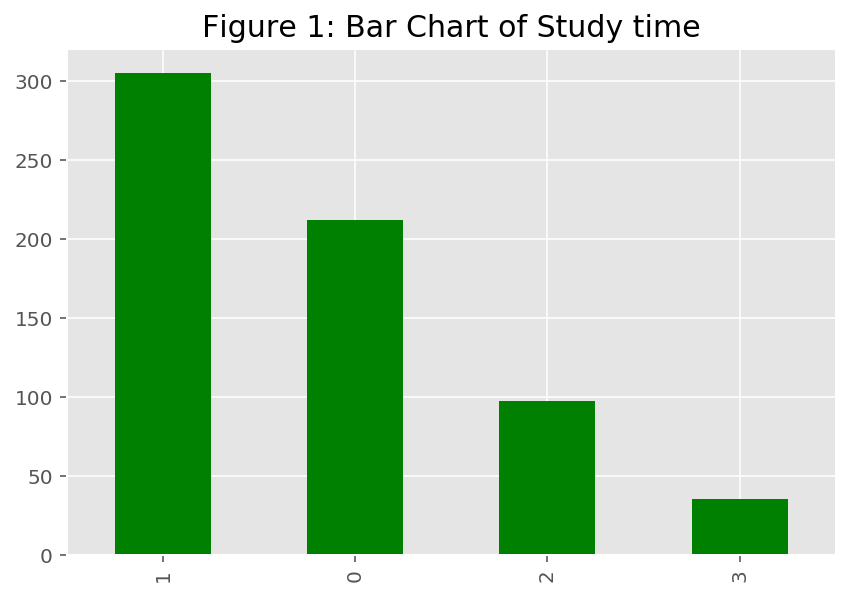

In [18]:
# df['studytime'].value_counts().plot(kind = 'bar', color = 'green', title = 'Study time')
# plt.show();

ax = df['studytime'].value_counts().plot(kind = 'bar', color = 'green')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.tight_layout()
plt.title('Figure 1: Bar Chart of Study time', fontsize = 15)
plt.show();

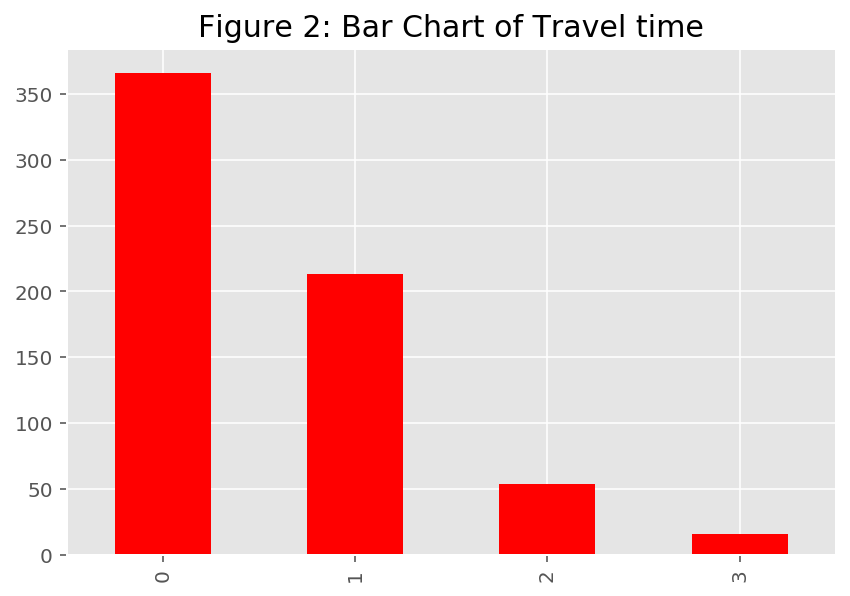

In [19]:
# df['traveltime'].value_counts().plot(kind = 'bar', color = 'red', title = 'Travel time')
# plt.show();


ax = df['traveltime'].value_counts().plot(kind = 'bar', color = 'red')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.tight_layout()
plt.title('Figure 2: Bar Chart of Travel time', fontsize = 15)
plt.show();

Let's display a boxplot and histogram for Final Grades. Figure 3 shows that this variable is left-skewed. 

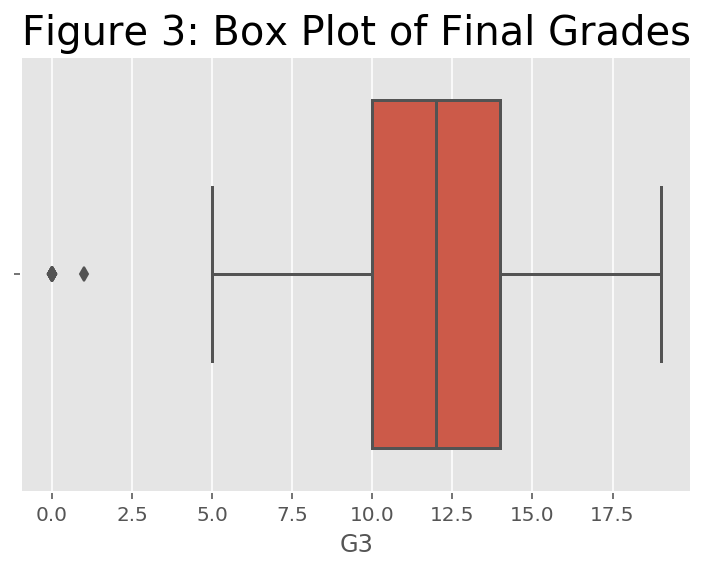

In [20]:
# get a box plot of final grades 
sns.boxplot(df['G3']).set_title('Figure 3: Box Plot of Final Grades', fontsize = 20)
plt.show();

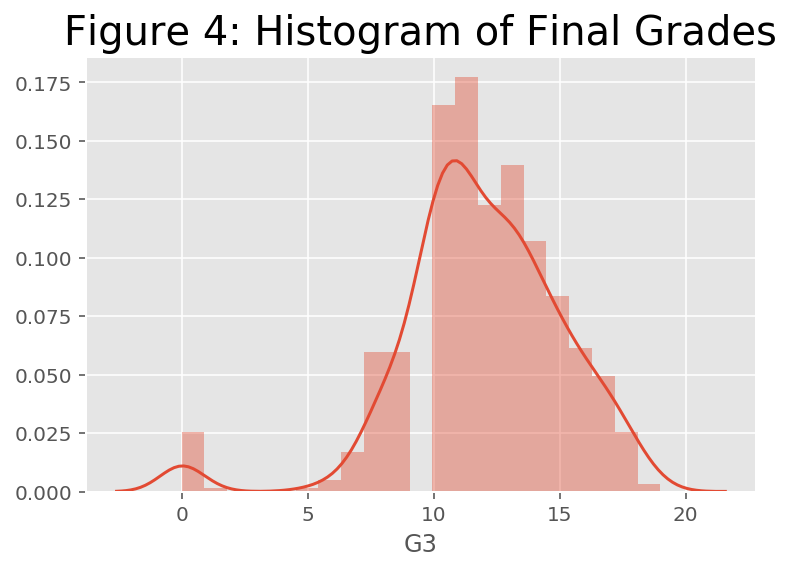

In [21]:
# get a histogram of age with kernel density estimate
sns.distplot(df['G3'], kde = True).set_title('Figure 4: Histogram of Final Grades', fontsize = 20)
plt.show();

## Multivariate Visualisation

### Scatterplot of Numerical Features & Final Grades

The scatterplot in Figure 5 shows no clear correlation between the absences and final grades numeric variables. 

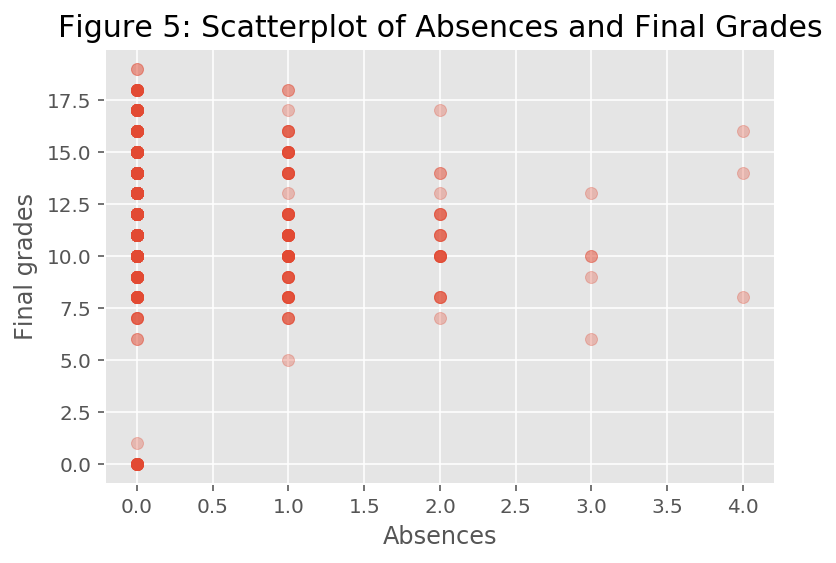

In [22]:
f = df['absences']
plt.scatter(f, df['G3'], alpha = 0.3)
plt.title('Figure 5: Scatterplot of Absences and Final Grades', fontsize = 15)
plt.xlabel('Absences')
plt.ylabel('Final grades')
plt.show();

### Catagorical attributes by Final Grades

We can see that the distribution of Final Grades between students involved in extra-curricular activities and those not is similar. 
The distribution of students taking paid classes and those not differ, but have a similiar median as seen in Figure 6. The whiskers suggest that students with a final grade of over 16 are more likely to not be involved in any sort of paid classes.

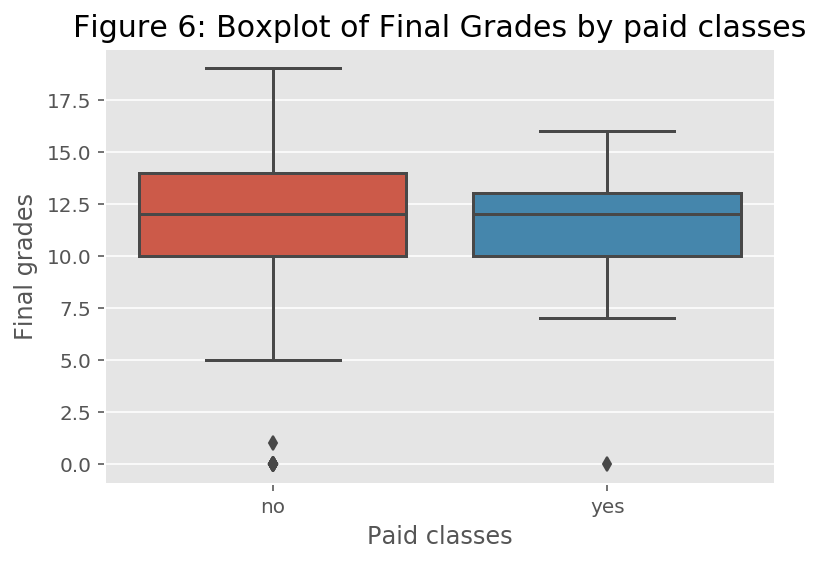

In [23]:
# Creating a boxplot
sns.boxplot(df['paid'], df['G3']);
plt.title('Figure 6: Boxplot of Final Grades by paid classes', fontsize = 15)
plt.xlabel('Paid classes')
plt.ylabel('Final grades')
plt.show();

# Statistical Modelling & Performance Evaluation

## Pairwise relationships

In [24]:
plt.rcParams['figure.figsize'] = (10,5)
sns.set(style="ticks", color_codes = True)

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate('{:.2f}'.format(r), xy=(0.4, 0.5), xycoords = ax.transAxes, fontsize = 20)

Let's plot pairwise relationships between `G3`, `school`, `sex`, `address`, `famsize`, `Medu` and `Fedu`:

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

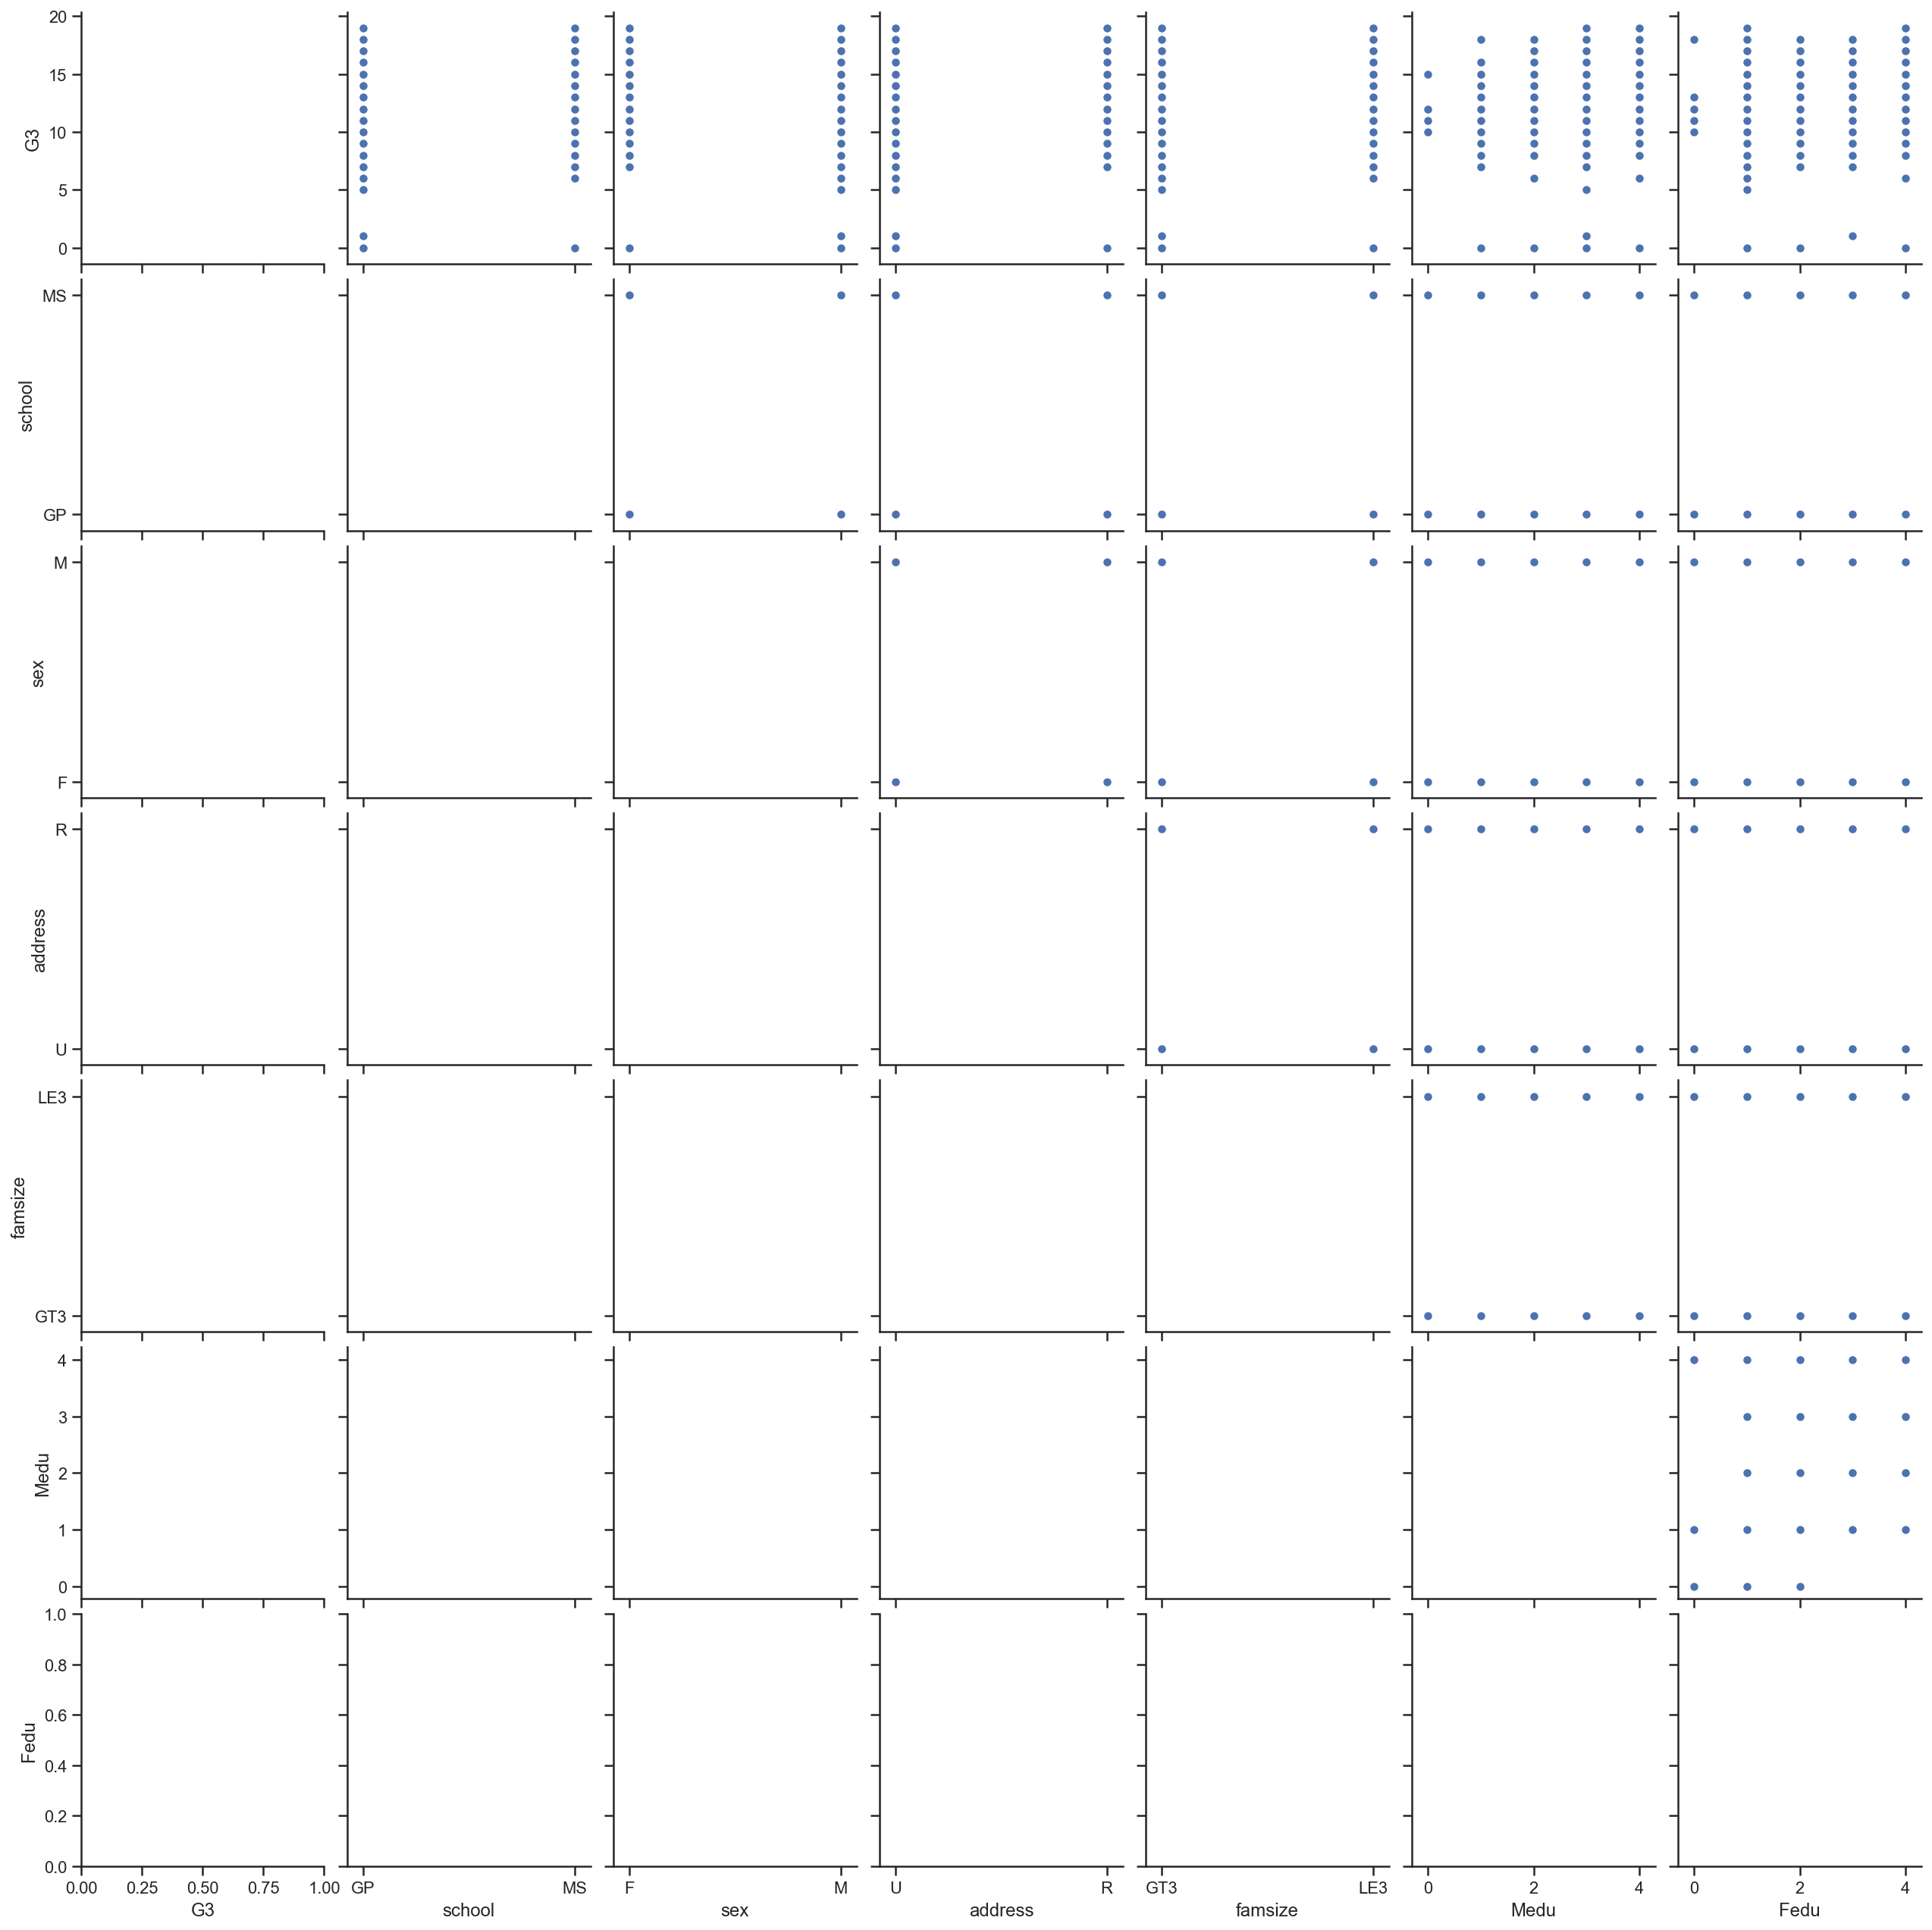

In [25]:
g1 = sns.PairGrid(df, vars = ['G3', 'school', 'sex', 'address', 'famsize', 'Medu', 'Fedu'])
g1.map_upper(sns.scatterplot)
g1.map_lower(corrfunc)
g1.map_diag(sns.distplot, kde = False)
plt.show();

Let's plot pairwise relationships between `G3`, `traveltime`, `studytime`, `failures`, `schoolsup`, `famsup` and `paid`:

In [ ]:
g2 = sns.PairGrid(df, vars = ['G3', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid'])
g2.map_upper(sns.scatterplot)
g2.map_lower(corrfunc)
g2.map_diag(sns.distplot, kde = False)
plt.show();

Let's plot pairwise relationships between `G3`, `higher`, `internet`, `romantic` and `famrel`:

In [ ]:
g3 = sns.PairGrid(df, vars = ['G3', 'higher', 'internet', 'romantic', 'famrel'])
g3.map_upper(sns.scatterplot)
g3.map_lower(corrfunc)
g3.map_diag(sns.distplot, kde = False)
plt.show();

Let's plot pairwise relationships between `G3`, `freetime`, `health`, `absences` and `Wkalc`:

In [ ]:
g4 = sns.PairGrid(df, vars = ['G3', 'freetime', 'health', 'absences', 'Wkalc'])
g4.map_upper(sns.scatterplot)
g4.map_lower(corrfunc)
g4.map_diag(sns.distplot, kde = False)
plt.show();

## Full Model

In [ ]:
dependant_var = 'G3'
independant_var = ' + '.join(df.drop(columns=['G3']).columns)
formula_string = dependant_var + ' ~ ' + independant_var

model = sm.formula.ols(formula = formula_string, data = df)
model_fitted = model.fit()
print(model_fitted.summary())

# Summary & Conclusions

## References